In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [26]:
encoder = OneHotEncoder()

In [2]:
column_names = ['class',
                'lymphatics',
                'block of affere',
                'bl. of lymph. c',
                'bl. of lymph. s',
                'by pass',
                'extravasates',
                'regeneration of',
                'early uptake in',
                'lym.nodes dimin',
                'lym.nodes enlar',
                'changes in lym',
                'defect in node',
                'changes in node',
                'changes in stru',
                'special forms',
                'dislocation of',
                'exclusion of no',
                'no. of nodes in']

df = pd.read_csv('lymphography.csv',
                 header=None,
                 names=column_names)
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [27]:
correlation_matrix = df.corr()
target_correlation_matrix = correlation_matrix['class'].drop('class')
target_correlation_matrix

lymphatics         0.147550
block of affere   -0.358447
bl. of lymph. c   -0.054812
bl. of lymph. s    0.212651
by pass            0.046761
extravasates       0.118952
regeneration of    0.397742
early uptake in    0.255697
lym.nodes dimin    0.411953
lym.nodes enlar    0.258756
changes in lym    -0.181180
defect in node     0.126130
changes in node    0.033030
changes in stru    0.291371
special forms      0.377557
dislocation of     0.215118
exclusion of no    0.232622
no. of nodes in    0.544329
Name: class, dtype: float64

In [4]:
columns_to_remove = ['bl. of lymph. c', 'by pass', 'changes in node']
df_cleaned = df.drop(columns=columns_to_remove)
df_cleaned.head(10)

,class,lymphatics,block of affere,bl. of lymph. s,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,2,1,2,2,2,8,1,1,2,2
1,2,3,2,1,2,1,2,1,3,3,2,4,2,2,2,2
2,3,3,2,2,2,2,2,1,4,3,3,8,3,2,2,7
3,3,3,1,1,2,1,2,1,3,3,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,2,2,4,5,1,2,2,1
5,2,2,1,1,1,1,2,1,3,3,3,6,3,1,2,4
6,2,2,2,1,1,1,2,1,2,3,2,8,2,1,1,1
7,2,3,2,1,2,1,2,1,2,2,2,1,3,1,1,1
8,3,2,2,1,1,1,2,1,3,2,2,8,3,1,2,5
9,3,2,1,1,1,1,2,1,2,2,3,5,3,1,1,2


In [5]:
#de-activated as yields lower explanatory value --> for further exploration
"""# Define mapping for replacement
replacement_mapping = {
    'class': {1: 'normal find', 2: 'metastases', 3: 'malign lymph', 4: 'fibrosis'},
    'lymphatics': {1: 'normal', 2: 'arched', 3: 'deformed', 4: 'displaced'},
    'block of affere': {1: 'no', 2: 'yes'},
    'bl. of lymph. s': {1: 'no', 2: 'yes'},
    'extravasates': {1: 'no', 2: 'yes'},
    'regeneration of': {1: 'no', 2: 'yes'},
    'early uptake in': {1: 'no', 2: 'yes'},
    'lym.nodes dimin': {1: '0', 2: '1', 3: '2', 4: '3'},
    'lym.nodes enlar': {1: '1', 2: '2', 3: '3', 4: '4'},
    'changes in lym': {1: 'bean', 2: 'oval', 3: 'round'},
    'defect in node': {1: 'no', 2: 'lacunar', 3: 'lac. marginal', 4: 'lac. central'},
    'changes in stru': {1: 'no', 2: 'grainy', 3: 'drop-like', 4: 'coarse', 5: 'diluted', 6: 'reticular', 7: 'stripped', 8: 'faint'},
    'special forms': {1: 'no', 2: 'chalices', 3: 'vesicles'},
    'dislocation of': {1: 'no', 2: 'yes'},
    'exclusion of no': {1: 'no', 2: 'yes'},
    'no. of nodes in': {1: '0-9', 2: '10-19', 3: '20-29', 4: '30-39', 5: '40-49', 6: '50-59', 7: '60-69', 8: '>=70'}
}

# Replace numeric values with descriptive labels
df_labelled = df_cleaned.replace(replacement_mapping)
df_labelled.head(10)"""

"# Define mapping for replacement\nreplacement_mapping = {\n    'class': {1: 'normal find', 2: 'metastases', 3: 'malign lymph', 4: 'fibrosis'},\n    'lymphatics': {1: 'normal', 2: 'arched', 3: 'deformed', 4: 'displaced'},\n    'block of affere': {1: 'no', 2: 'yes'},\n    'bl. of lymph. s': {1: 'no', 2: 'yes'},\n    'extravasates': {1: 'no', 2: 'yes'},\n    'regeneration of': {1: 'no', 2: 'yes'},\n    'early uptake in': {1: 'no', 2: 'yes'},\n    'lym.nodes dimin': {1: '0', 2: '1', 3: '2', 4: '3'},\n    'lym.nodes enlar': {1: '1', 2: '2', 3: '3', 4: '4'},\n    'changes in lym': {1: 'bean', 2: 'oval', 3: 'round'},\n    'defect in node': {1: 'no', 2: 'lacunar', 3: 'lac. marginal', 4: 'lac. central'},\n    'changes in stru': {1: 'no', 2: 'grainy', 3: 'drop-like', 4: 'coarse', 5: 'diluted', 6: 'reticular', 7: 'stripped', 8: 'faint'},\n    'special forms': {1: 'no', 2: 'chalices', 3: 'vesicles'},\n    'dislocation of': {1: 'no', 2: 'yes'},\n    'exclusion of no': {1: 'no', 2: 'yes'},\n    'no

In [28]:
df.to_csv('lymphography_cleaned.csv', index=False)  #add correct path

In [29]:
df_cleaned = pd.read_csv('lymphography_cleaned.csv')  #add correct path

seed_value = 42
train_data, test_data = train_test_split(df_cleaned, test_size=70, train_size=78, random_state=seed_value)

features = df.drop(columns=["class"])
onehot = encoder.fit_transform(features)

In [8]:
# Fit and transform the categorical features
X_train = train_data.drop(columns=['class'])

# Separate features and target variable in training data
X_train = X_train
y_train = train_data['class']

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=seed_value)

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Print a message to confirm that the model is trained
print("Decision tree model trained successfully!")

Decision tree model trained successfully!


In [14]:
# Fit and transform the categorical features on the combined data
X_test = test_data.drop(columns=['class'])
# Separate features and target variable in test data
X_test = X_test
y_test = test_data['class']

# Use the trained decision tree model to make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


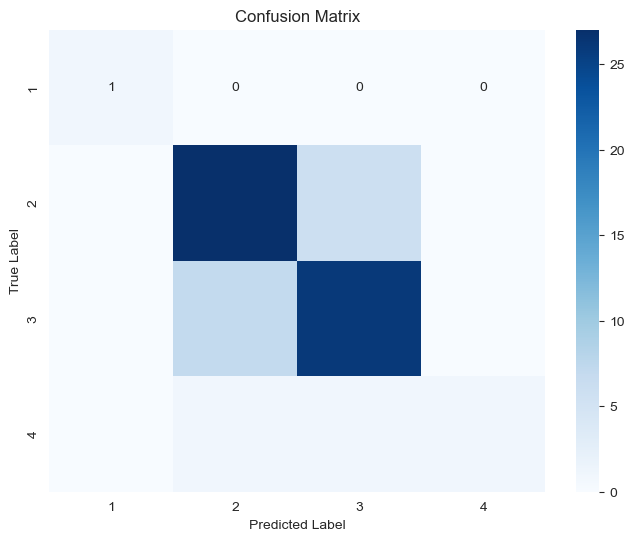

In [34]:
# Generate predictions on the test data
y_pred = decision_tree.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

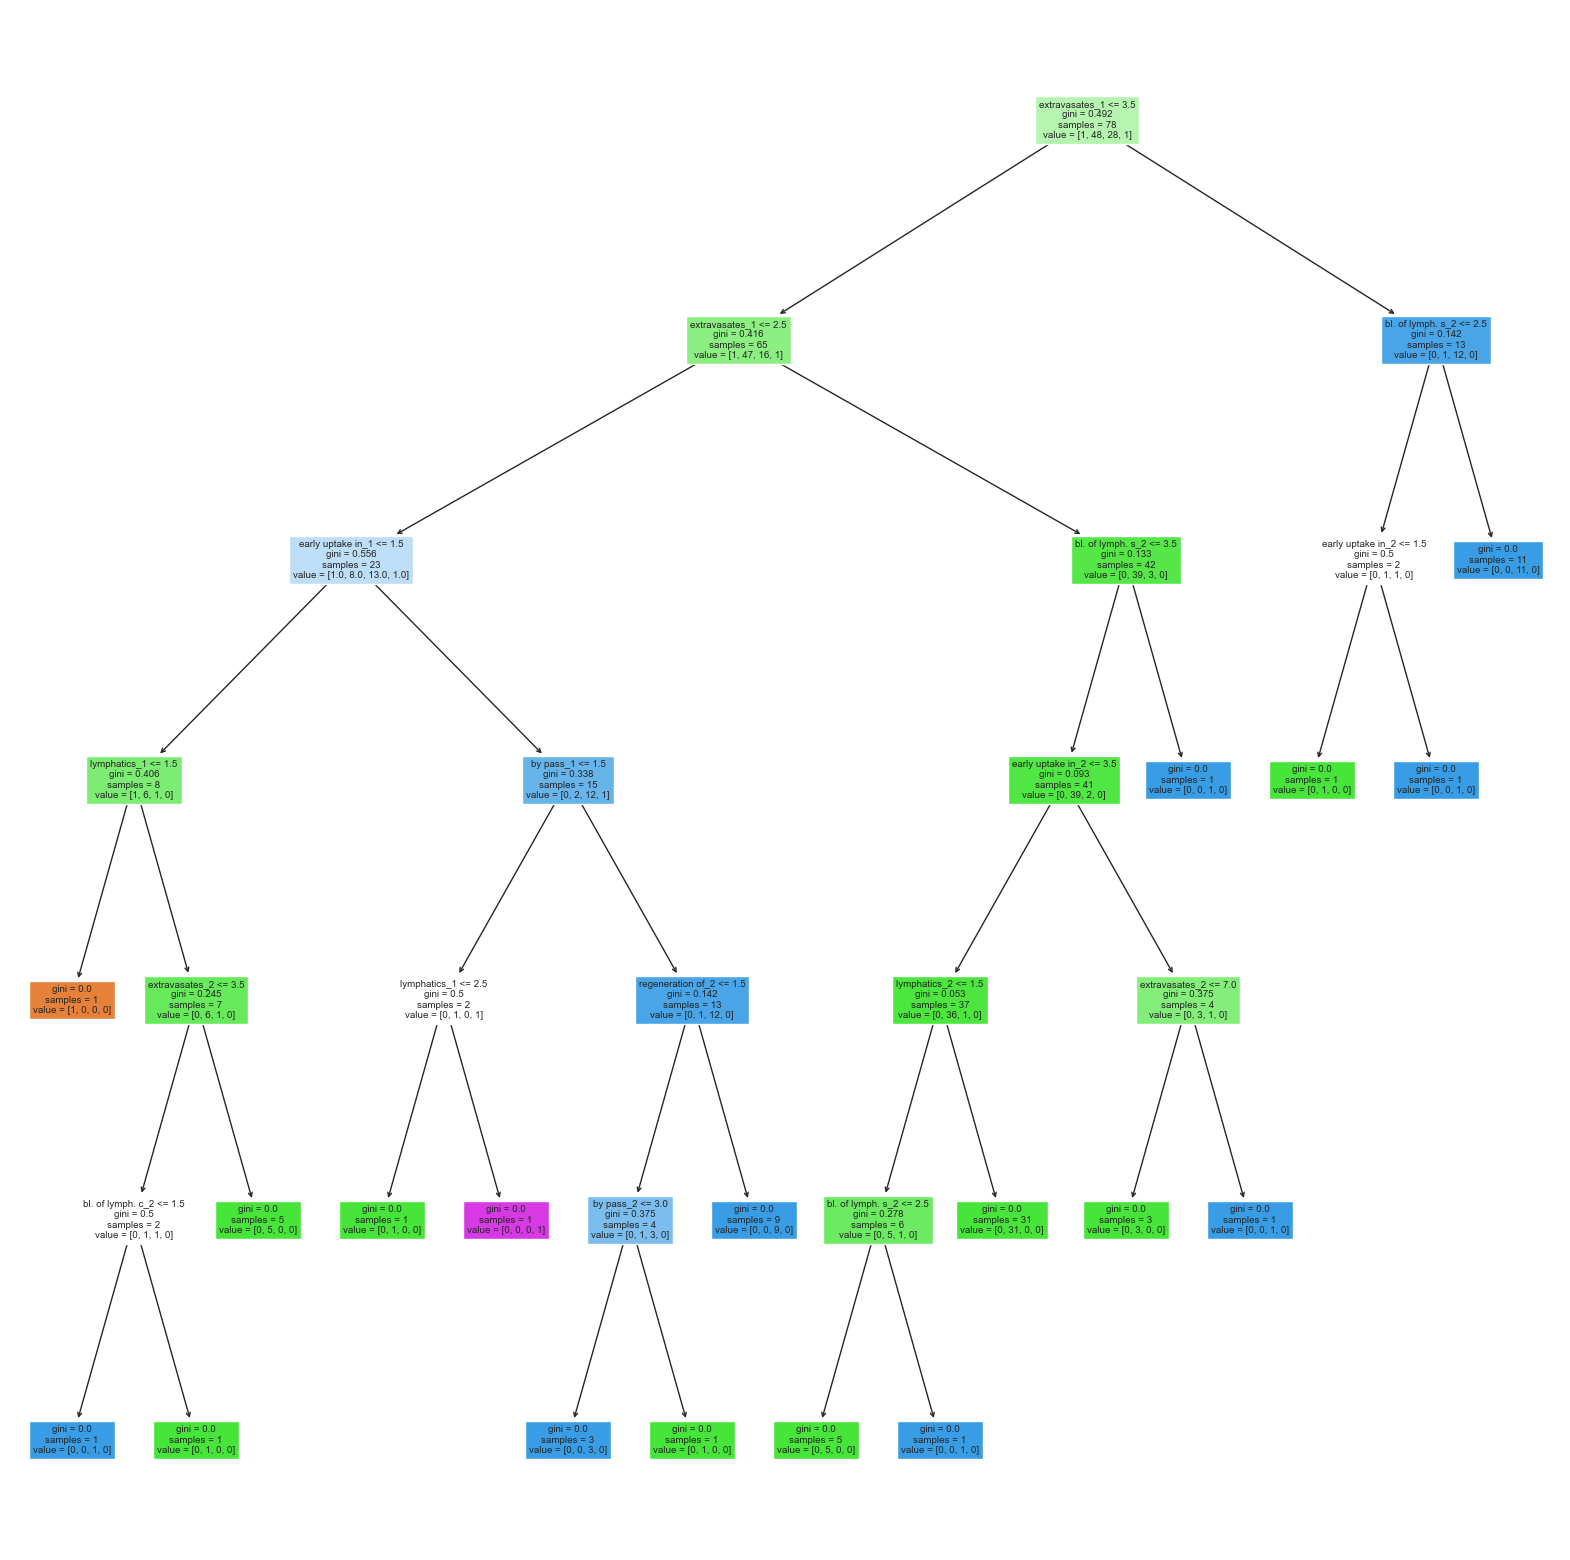

In [36]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree, filled=True, feature_names=encoder.get_feature_names_out())
plt.show()